In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
img_path = "../output_videos/cropped_img.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

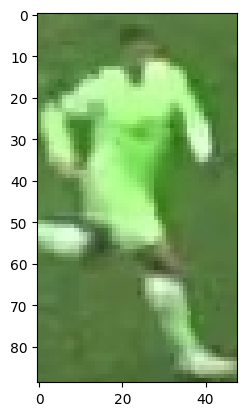

In [3]:
plt.imshow(img)
plt.show()

## Take the top half of the img

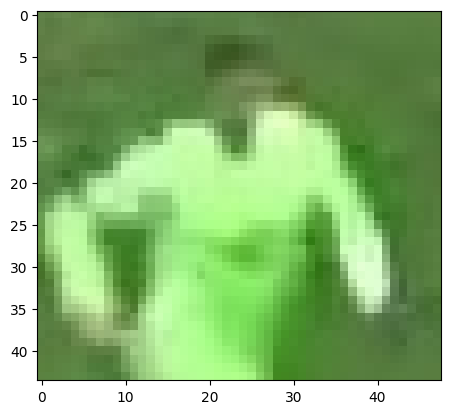

In [4]:
th_img = img[0  :int(img.shape[0]/2), :]
plt.imshow(th_img)
plt.show()

## Cluster the img into two cluster 

This is needed to get the background color and the shirt color

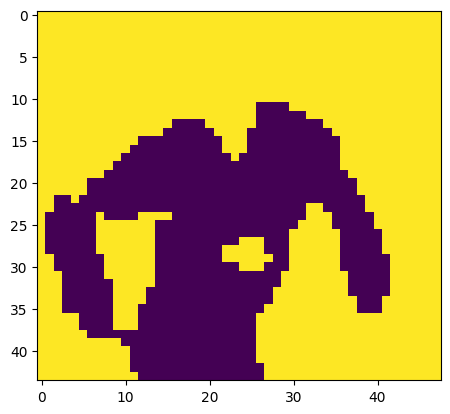

In [11]:
#reshape img to 2D array
img_2d = th_img.reshape(-1, 3)

#perform clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_2d)

#get the cluster labels
labels = kmeans.labels_

#reshape labels into original img shape
clustered_img = labels.reshape(th_img.shape[0], th_img.shape[1])

#display clustered img
plt.imshow(clustered_img)
plt.show()

Idea: In the corners the the labels represent the background in most of the time, use this, to identify background label, and therefore kit label

In [12]:
corner_clusters = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]
background_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(background_cluster)

1


In [14]:
kit_cluster = 1 - background_cluster
print(kit_cluster)

0


In [15]:
kit_color = kmeans.cluster_centers_[kit_cluster]
print(kit_color)

[171.70435967 236.07493188 143.10354223]
